In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Read the data from the CSV file
wanted_plots = ["Sensitivity", "Specificity", "Precision", "Accuracy", "F1 Score"]

df = pd.read_csv("confusion_matrices_condensed.csv")
# Trim the " " from the Pipeline column
df['Pipeline'] = df['Pipeline'].str.strip("\"")

# Replace "- " with None
df = df.replace("- ", None)

# Convert the wanted plots to floats
for plot in wanted_plots:
    df[plot] = df[plot].astype(float)

df

,Organism,Sensitivity,Specificity,Precision,Accuracy,F1 Score,Pipeline,Filtering
0,Achromobacter xylosoxidans,0.75,1.000,1.000,0.800,0.857,Biobakery3,0
1,Acinetobacter baumannii,0.75,1.000,1.000,0.800,0.857,Biobakery3,0
2,Aeromonas hydrophila,0.80,NaN,1.000,0.800,0.889,Biobakery3,0
3,Enterococcus faecalis,1.00,1.000,1.000,1.000,1.000,Biobakery3,0
4,Escherichia coli,1.00,0.000,0.800,0.800,0.889,Biobakery3,0
...,...,...,...,...,...,...,...,...
75,Staphylococcus aureus,1.00,0.000,0.800,0.800,0.889,Woltka,0
76,Streptococcus pyogenes,1.00,0.000,0.800,0.800,0.889,Woltka,0
77,Vibrio furnissii,0.00,1.000,NaN,0.200,NaN,Woltka,0
78,Harmonic Mean,0.00,0.000,0.828,0.571,0.906,Woltka,0


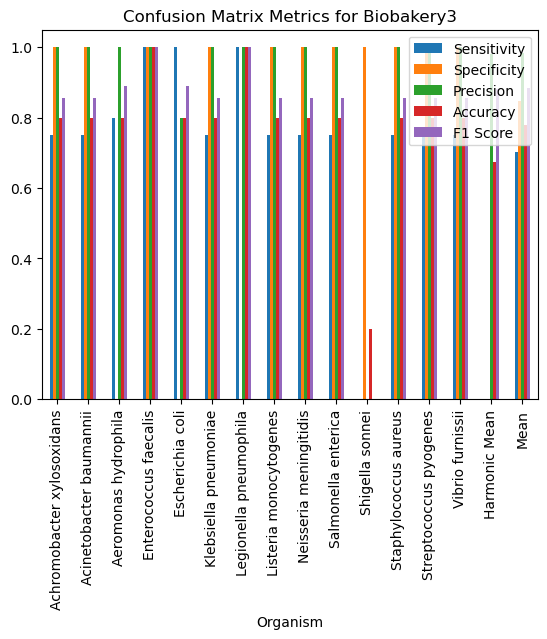

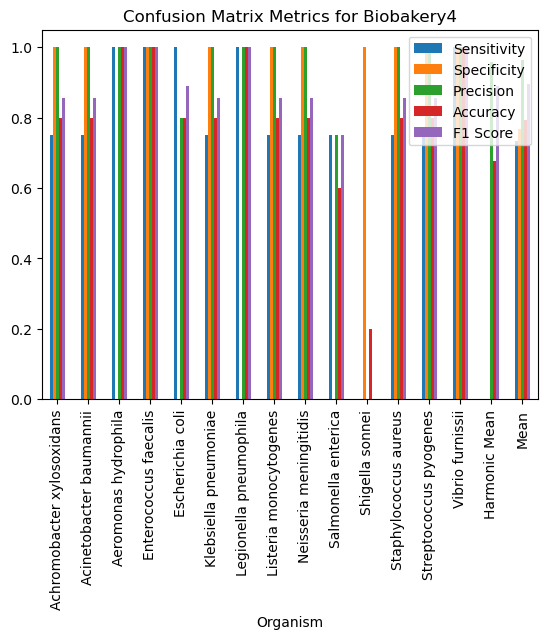

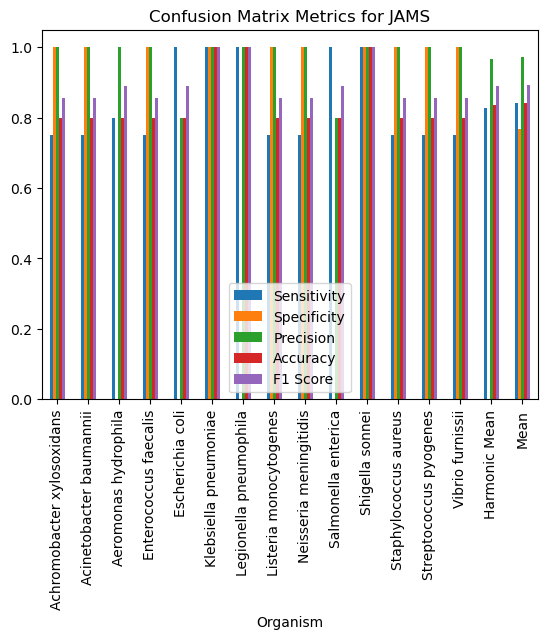

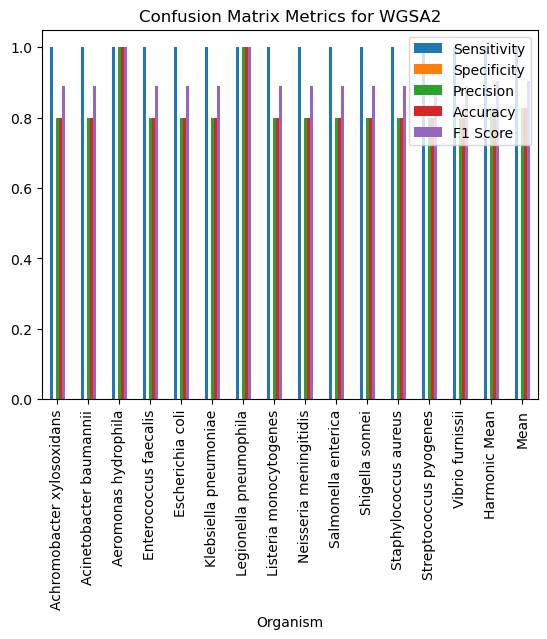

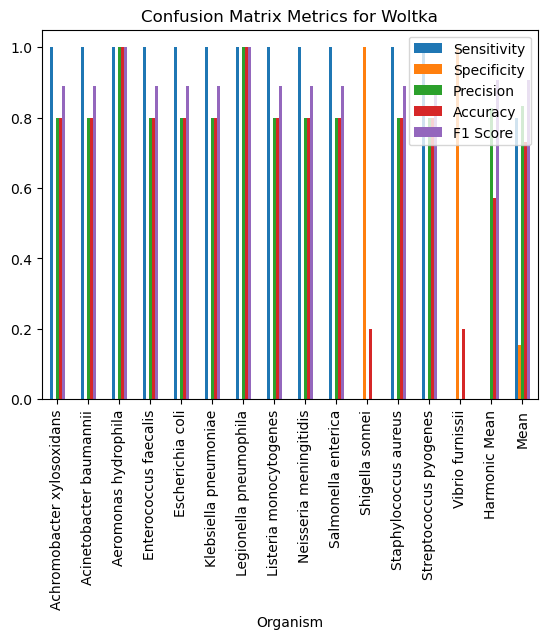

In [47]:

for pipeline in df.Pipeline.unique():
    pipeline_df = df[df.Pipeline == pipeline]
    # Plot x as Organism and Y as wanted_plots
    pipeline_df.plot(x="Organism", y=wanted_plots, kind="bar", title=f"Confusion Matrix Metrics for {pipeline}")
    plt.show()